In [109]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as ctrl

In [110]:
temperature = ctrl.Antecedent(np.arange(20, 81, 1), 'temperature')
smoke = ctrl.Antecedent(np.arange(0, 1001, 1), 'smoke')
fire = ctrl.Antecedent(np.arange(0, 1001, 1), 'fire')
pump_speed = ctrl.Consequent(np.arange(0, 241, 1), 'pump_speed')

**Define Temperature**

c:\anaconda3\envs\pyenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


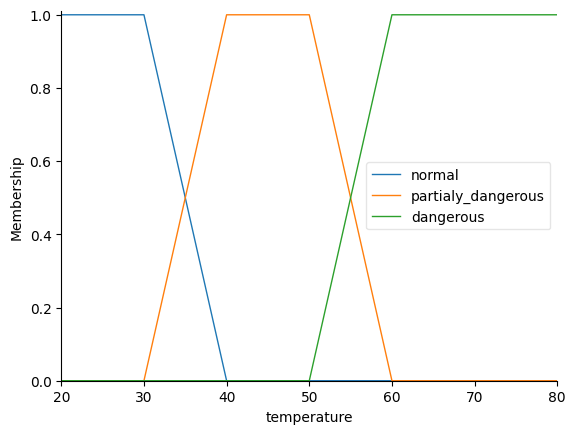

In [111]:
temperature['normal'] = skf.trapmf(temperature.universe, [20, 20, 30, 40])
temperature['partialy_dangerous'] = skf.trapmf(temperature.universe, [30, 40, 50, 60])
temperature['dangerous'] = skf.trapmf(temperature.universe, [50, 60, 80, 80])

temperature.view()

**Define Smoke**

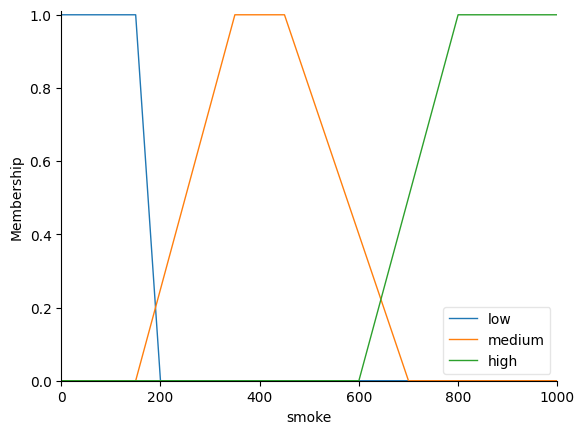

In [112]:
smoke['low'] = skf.trapmf(smoke.universe, [0, 0, 150, 200])
smoke['medium'] = skf.trapmf(smoke.universe, [150, 350, 450, 700])
smoke['high'] = skf.trapmf(smoke.universe, [600, 800, 1000, 1000])

smoke.view()

**Define Fire**

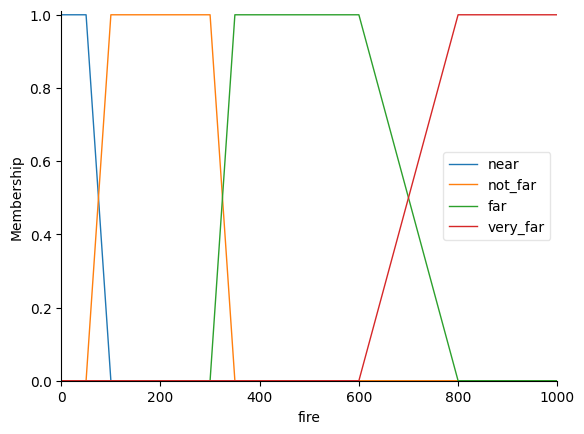

In [113]:
fire['near'] = skf.trapmf(fire.universe, [0, 0, 50, 100])
fire['not_far'] = skf.trapmf(fire.universe, [50, 100, 300, 350])
fire['far'] = skf.trapmf(fire.universe, [300, 350, 600,800])
fire['very_far'] = skf.trapmf(fire.universe, [600, 800, 1000, 1000])

fire.view()

**Define Pump Speed**

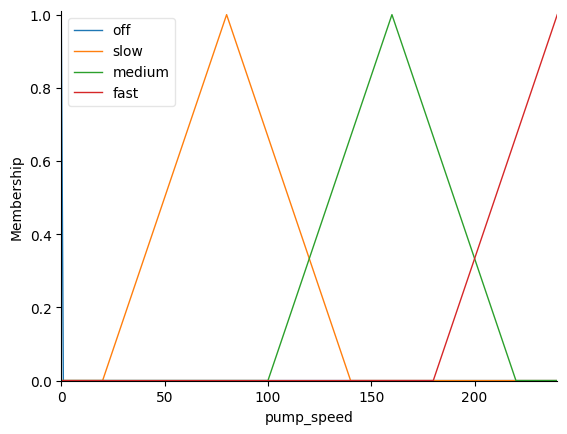

In [114]:
pump_speed['off'] = skf.trimf(pump_speed.universe, [0, 0, 0])
pump_speed['slow'] = skf.trimf(pump_speed.universe, [20, 80, 140])
pump_speed['medium'] = skf.trimf(pump_speed.universe, [100, 160, 220])
pump_speed['fast'] = skf.trapmf(pump_speed.universe, [180, 240, 240, 240])

pump_speed.view()

In [115]:
rules = [
    # temperature dangerous
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['very_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature partialy dangerous
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature medium
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['near'], pump_speed['medium'])
]

In [116]:
input_temperature = 75
input_fire = 650
input_smoke = 320

In [117]:
def mamdani(input_temperature, input_fire, input_smoke):
    control_system = ctrl.ControlSystem(rules)

    # Simulate the system
    simulation = ctrl.ControlSystemSimulation(control_system)
    simulation.input['temperature'] = input_temperature
    simulation.input['smoke'] = input_smoke
    simulation.input['fire'] = input_fire

    simulation.compute()

    output_action = simulation.output['pump_speed']
    return output_action, simulation

output_action, simulation =  mamdani(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)
print(f'Water Pump Speed Output: {output_action} m/s')

Water Pump Speed Output: 135.73770491803276 m/s


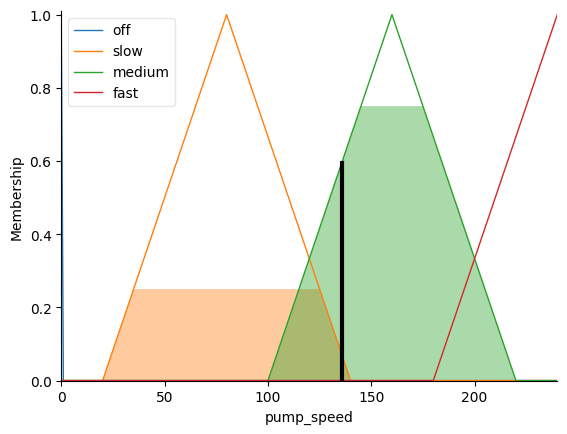

In [118]:
pump_speed.view(sim=simulation)

In [119]:
import pandas as pd

input_data = pd.read_excel('D:/Code/py_code/Fuzzy-Logic/input-data.xlsx', sheet_name='Input')
input_data

,Temperature,Smoke,Fire
0,48.2,193,43
1,40.0,300,900
2,35.0,150,320
3,65.0,450,50
4,75.0,700,650
5,35.0,50,950
6,40.0,50,700
7,65.0,100,400
8,75.0,50,50
9,35.0,750,50


In [120]:
def process_data(input_data):
    output_data = []
    for row in range(input_data.shape[0]):
        input_temperature = input_data['Temperature'][row]
        input_smoke = input_data['Smoke'][row]
        input_fire = input_data['Fire'][row]

        output_action, simulation =  mamdani(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)

        output_data.append([input_temperature, input_smoke, input_fire, output_action])

    return pd.DataFrame(output_data, columns=['Temperature', 'Smoke', 'Fire', 'Output'])

In [121]:
output_data = process_data(input_data)
output_data.to_excel('mamdani.xlsx', sheet_name='mamdani', index=False)

In [122]:
import pandas as pd

excel_files = ['input-data.xlsx', 'tsukamoto.xlsx', 'mamdani.xlsx']

with pd.ExcelWriter('output-data.xlsx') as writer:
    for file in excel_files:
        df = pd.read_excel(file)
        sheet_name = file.split('.')[0]

        df.to_excel(writer, sheet_name=sheet_name, index=False)

output = pd.read_excel('D:/Code/py_code/Fuzzy-Logic/output-data.xlsx', sheet_name='mamdani')
output

,Temperature,Smoke,Fire,Output
0,48.2,193,43,179.123668
1,40.0,300,900,0.350000
2,35.0,150,320,120.000000
3,65.0,450,50,220.000000
4,75.0,700,650,160.000000
5,35.0,50,950,0.388889
6,40.0,50,700,79.342057
7,65.0,100,400,160.000000
8,75.0,50,50,220.000000
9,35.0,750,50,176.575342
